<a href="https://colab.research.google.com/github/Kreber10010/p2-time_series/blob/main/Modelos/ARIMA_teste01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dados01.csv')
df['HR_MEDICAO']= df['HR_MEDICAO'].astype(str)

df.loc[df.HR_MEDICAO == '0', 'HR_MEDICAO'] = '000'
df['HR_MEDICAO'].head()

0    000
1    100
2    200
3    300
4    400
Name: HR_MEDICAO, dtype: object

In [21]:
df['ref'] = df['DT_MEDICAO'] + " " + df['HR_MEDICAO']
df['ref'] = pd.to_datetime(df['ref'], errors='coerce', format='%Y-%m-%d %H%M%S')
df.set_index('ref', inplace=True)
df.head()

,Unnamed: 0,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
ref,,,,,,
2021-03-09 00:00:00,0,2021-03-09,000,25.1,96.0,3.289
2021-03-09 01:00:00,1,2021-03-09,100,25.1,93.0,1.740
2021-03-09 02:00:00,2,2021-03-09,200,24.7,94.0,0.970
2021-03-09 03:00:00,3,2021-03-09,300,24.4,93.0,2.458
2021-03-09 04:00:00,4,2021-03-09,400,24.3,92.0,3.320


In [22]:
faltantes = df.isnull().sum()
print(faltantes)

Unnamed: 0      0
DT_MEDICAO      0
HR_MEDICAO      0
TEM_INS        89
UMD_INS       283
RAD_GLO        89
dtype: int64


In [23]:
df['TEM_INS'] = df['TEM_INS'].fillna(df['TEM_INS'].mean())

In [24]:
faltantes2 = df.isnull().sum()
print(faltantes2)

Unnamed: 0      0
DT_MEDICAO      0
HR_MEDICAO      0
TEM_INS         0
UMD_INS       283
RAD_GLO        89
dtype: int64


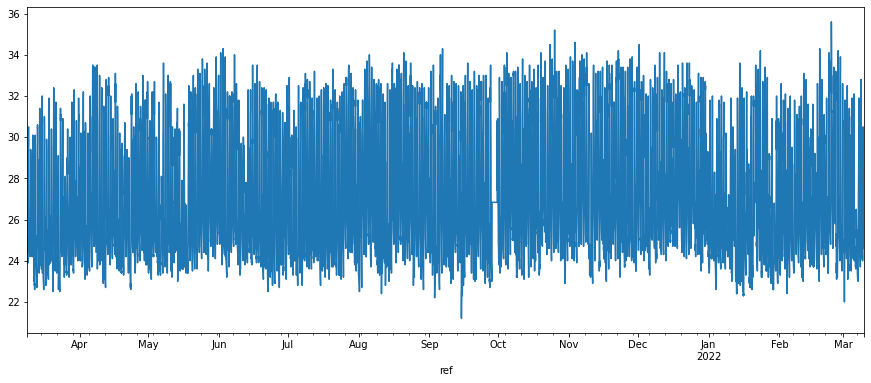

In [25]:
df['TEM_INS'].plot(figsize=(15, 6))

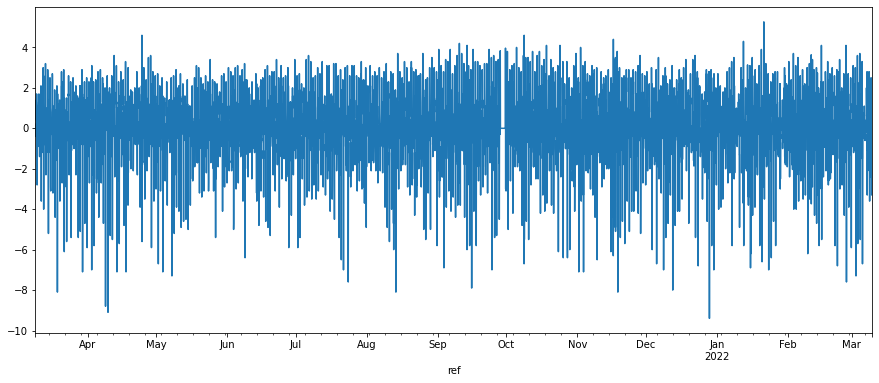

In [26]:
df.TEM_INS.diff().plot(figsize=(15, 6))

In [27]:
from statsmodels.tsa.arima_model import ARIMA, ARMA

arima = ARIMA(df.TEM_INS, freq='H', order=(5, 1, 2)).fit()
(arima.resid ** 2).mean() #-->Erro quadrático médio
#arima.resid.mean() -->Erro absoluto, média

1.3639010252159474

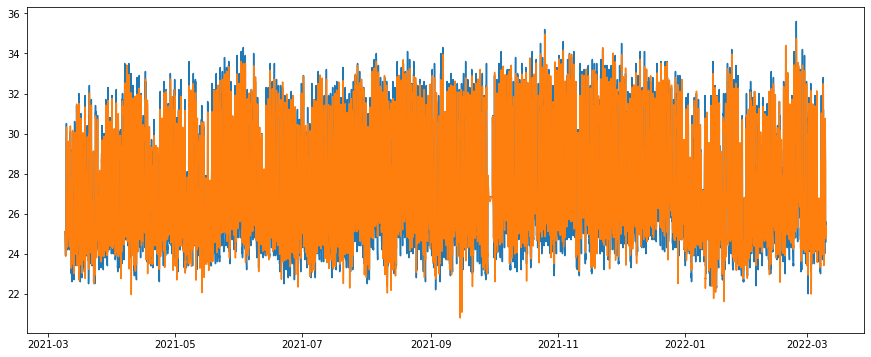

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(df.TEM_INS)
plt.plot(arima.predict(typ='levels'))

In [39]:
arima.forecast(24)[0]

array([24.63095529, 24.76827361, 24.98556218, 25.26168232, 25.57892303,
       25.91331014, 26.24075436, 26.53916963, 26.78998491, 26.97908393,
       27.09747054, 27.14155764, 27.11307052, 27.01859029, 26.86879378,
       26.67746159, 26.46033718, 26.23392444, 26.01430993, 25.81608883,
       25.65146141, 25.52955105, 25.45597627, 25.4326899 ])

Testando vários configurações do modelo arima e com o segundo parâmetro 0 (x, 0, y), onde nada mais é que o modelo ARMA (x, y).

In [43]:
orders = [(2, 0, 1), (3, 0, 1), (3, 0, 2), (2, 1, 1), (2, 1, 2), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
best = 10000
for order in orders:
  try:
    model = ARIMA(df.TEM_INS, freq='H', order=order).fit()
    erro = (model.resid ** 2).mean()
    if erro < best:
      print(f'ARIMA{order}, erro={erro}')
      best = erro
  except:
    pass

ARIMA(2, 0, 1), erro=1.4134751743110547
ARIMA(3, 0, 2), erro=1.2912343331629654
